# IMPORTS

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
dispps= pd.read_csv ("monDFparHab.csv")

# CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)

In [3]:
dispps.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo alim Kcal/pers/jour'},inplace=True)


In [4]:
dispps=dispps[['Zone', 'Dispo alim Kcal/pers/jour',
       'Balance Commerciale/kg/personne/an', 
               'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Production/kg/personne/an',
               'Variation de stock/kg/personne/an',
       'Population total', 
               'Pib Per hab (2018, $)', 'Stabilité politique/personne/an',
              ]]

In [5]:
D=dispps[['Zone', 'Dispo alim Kcal/pers/jour',
          'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an',
       'Pib Per hab (2018, $)', 'Stabilité politique/personne/an']]
DC = ['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']

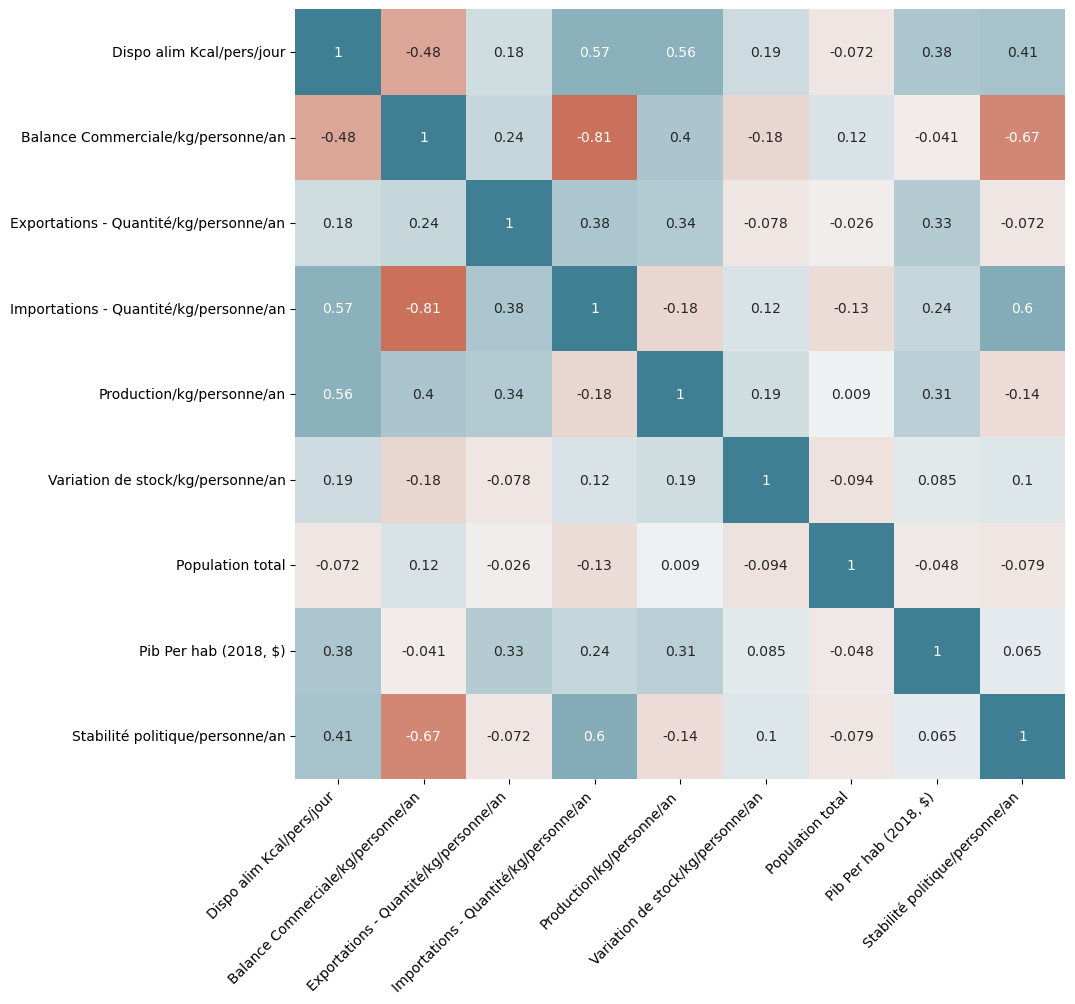

In [6]:
corr_matrix = round(dispps.corr(method='pearson'),3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

In [7]:
D = D.set_index('Zone')
dispps = dispps.set_index('Zone')
    

In [8]:
D

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Zone,,,,,
Afghanistan,5.0,0.000000,0.780159,502.06,-0.073981
Afrique du Sud,143.0,1.090107,8.893885,7048.52,-0.004845
Albanie,85.0,0.000000,13.181903,5287.66,0.131819
Algérie,22.0,0.000000,0.047361,4171.80,-0.018708
Allemagne,71.0,7.771483,10.129394,47939.28,0.007218
...,...,...,...,...,...
Émirats arabes unis,147.0,9.760191,44.959178,46722.27,0.076836
Équateur,83.0,0.000000,0.000000,6321.35,-0.004097
États-Unis d'Amérique,219.0,11.287197,0.376036,62823.31,0.001467


In [9]:
#min_max_scaler = preprocessing.MinMaxScaler() 
#X = min_max_scaler.fit_transform(D)
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(D)

X = pd.DataFrame(X) 

In [10]:
X=X.set_index(D.index)

In [11]:
X

,0,1,2,3,4
Zone,,,,,
Afghanistan,-1.151721,-0.310071,-0.543774,-0.707659,-0.315286
Afrique du Sud,1.133238,-0.211604,-0.103072,-0.386153,-0.282777
Albanie,0.172893,-0.310071,0.129834,-0.472631,-0.218515
Algérie,-0.870241,-0.310071,-0.583577,-0.527433,-0.289296
Allemagne,-0.058915,0.391911,-0.035965,1.622053,-0.277105
...,...,...,...,...,...
Émirats arabes unis,1.199469,0.571547,1.855835,1.562284,-0.244369
Équateur,0.139778,-0.310071,-0.586149,-0.421865,-0.282426
États-Unis d'Amérique,2.391622,0.709479,-0.565724,2.353030,-0.279809


## ELBOW CURVE-COUDE SCALED

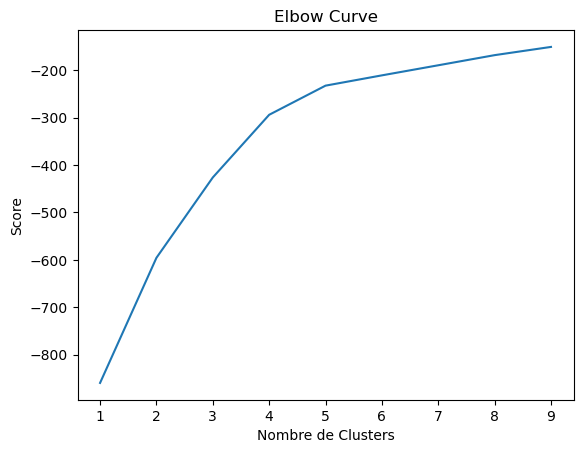

In [12]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## METHOD SILHOUETTE SCALED

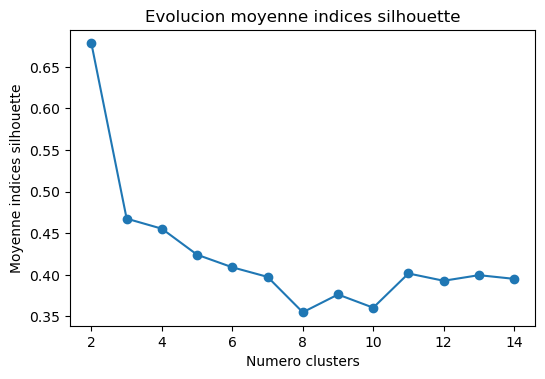

In [13]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion moyenne indices silhouette")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Moyenne indices silhouette');


In [14]:
# Je laisse X comme scale
#min_max_scaler = preprocessing.MinMaxScaler() 
#X = min_max_scaler.fit_transform(D)
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(D)


X = pd.DataFrame(X) 


## DENDROGRAMME

### SCALED

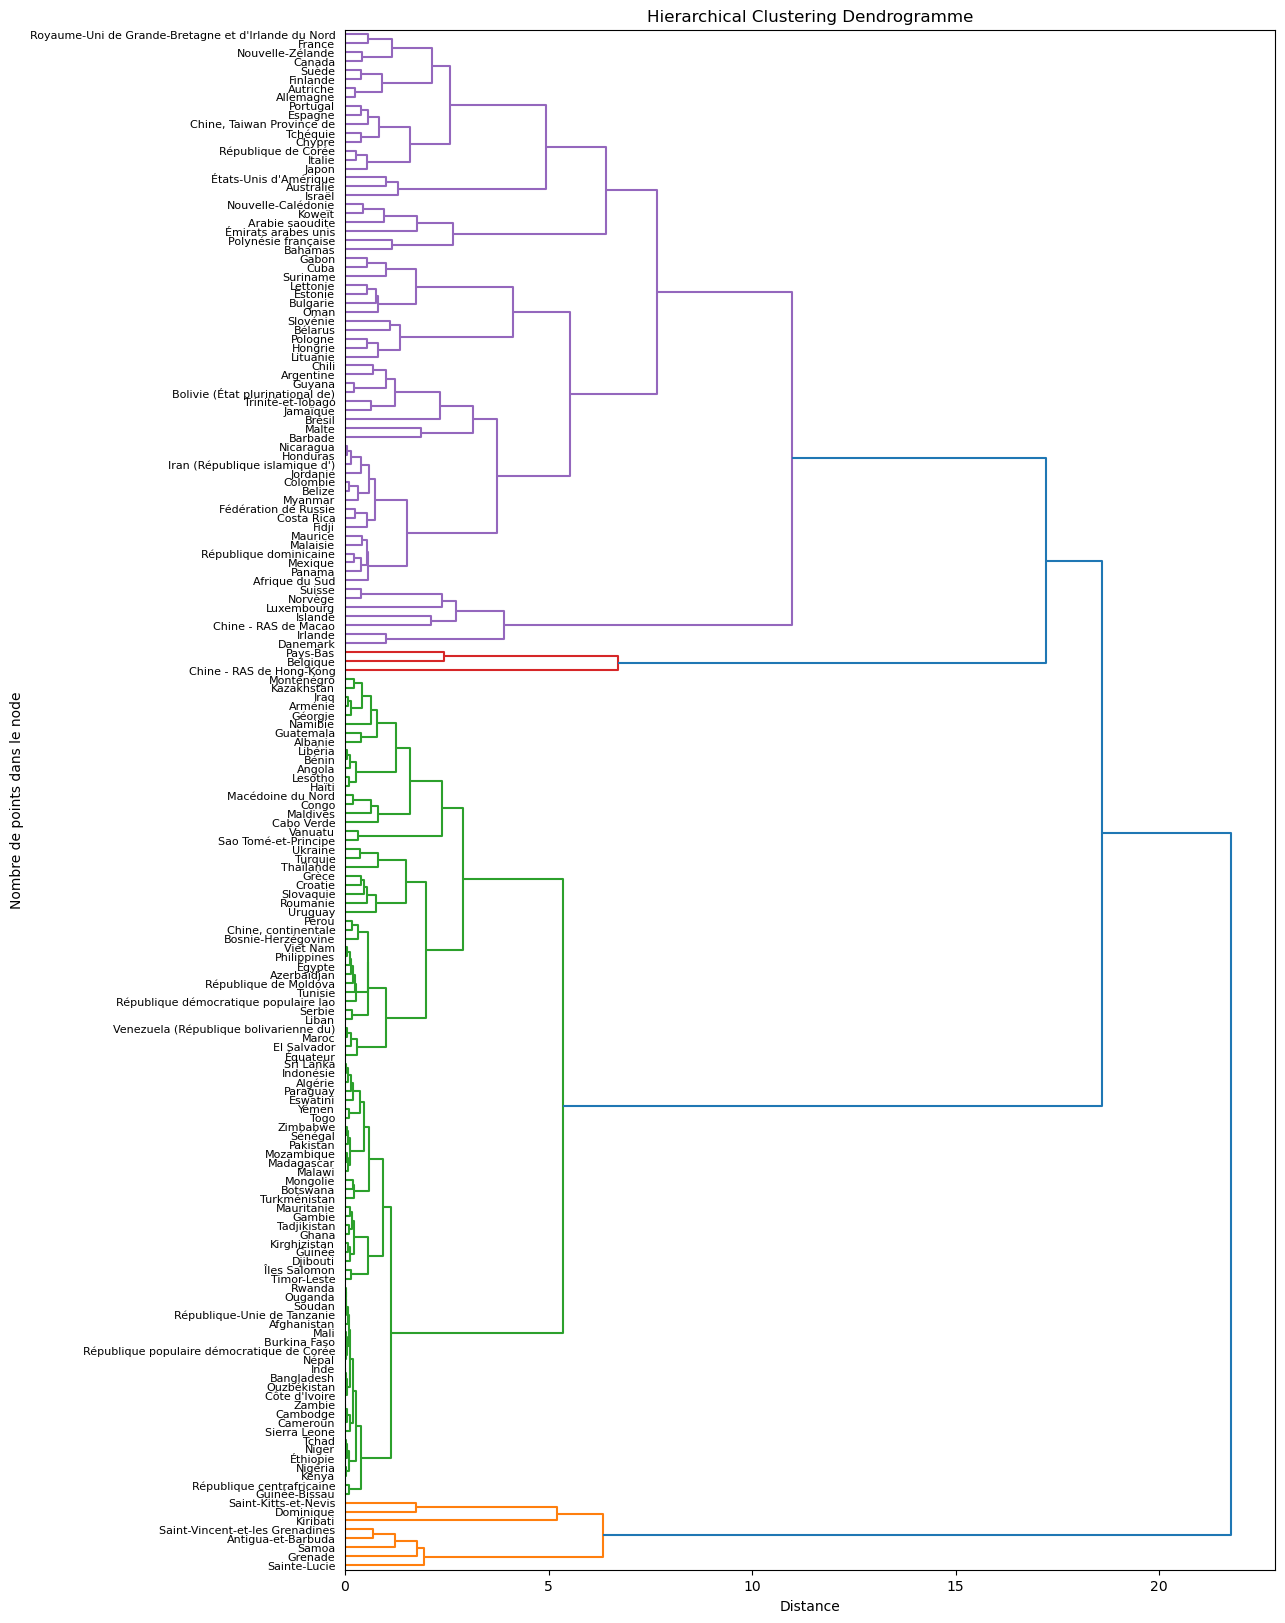

In [15]:
plt.figure(figsize=(12,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), labels=D.index,leaf_font_size=8,orientation='right')
plt.title('Hierarchical Clustering Dendrogramme')
plt.ylabel('Nombre de points dans le node')#,fontsize=18)
plt.xlabel('Distance')
plt.show()

### NON SCALED

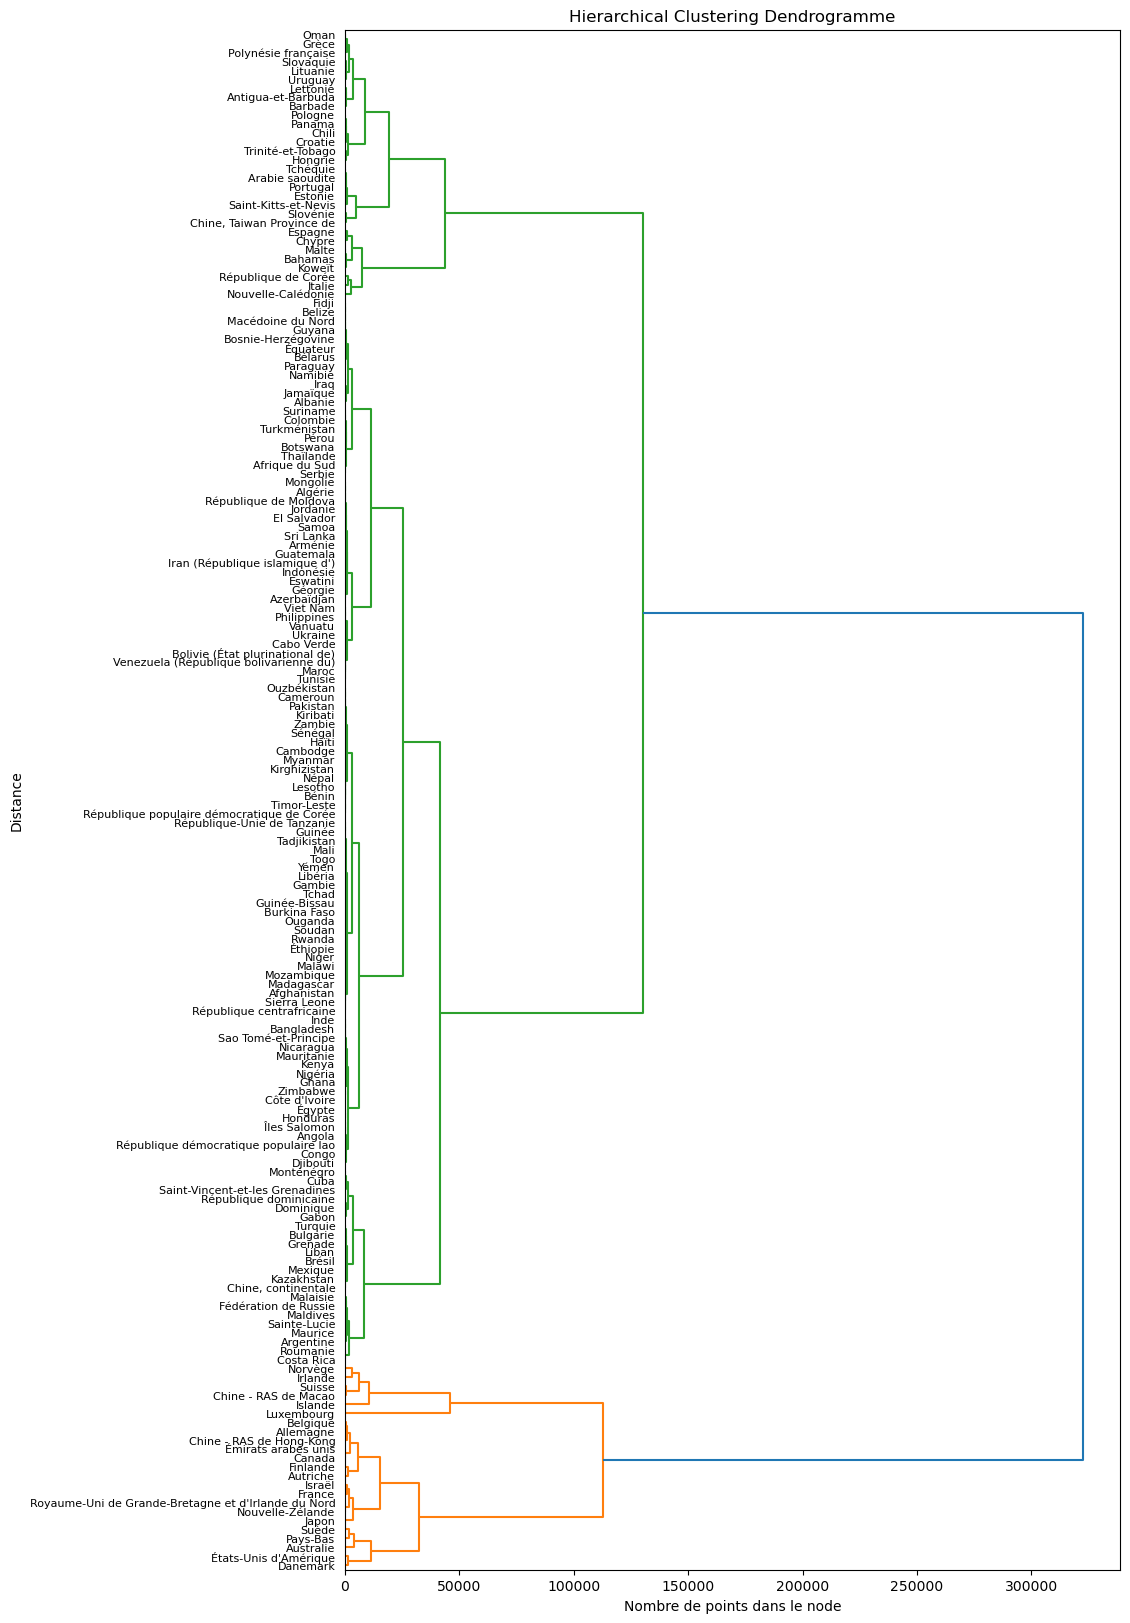

In [16]:
plt.figure(figsize=(10,20))
dendrogram = sch.dendrogram(sch.linkage(D, method = 'ward'), labels=D.index,leaf_font_size=8,orientation='right')
plt.title('Hierarchical Clustering Dendrogramme')
plt.xlabel('Nombre de points dans le node')
plt.ylabel('Distance')
plt.show()

# NUAGE POINS CLUSTER 0 vs CLUSTER 1

## SCALED

In [17]:
#Réaliser la classification hiérarchique

In [18]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
X=X.values

In [19]:
#Obtenir les centroïdes de chaque cluster

In [20]:
centroids = []
for i in range(3):
    centroids.append(np.mean(X[y_hc == i], axis=0))

In [21]:
#Tracer les points de données et les centroïdes dans un graphique

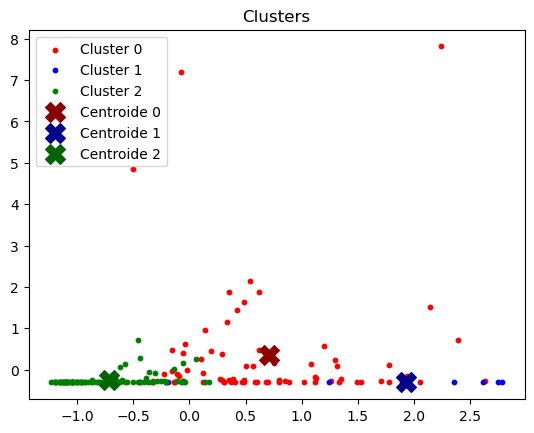

In [22]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=10, c='red', label='Cluster 0') # tracer les points du cluster 0 en rouge
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=10, c='blue', label='Cluster 1') # tracer les points du cluster 1 en bleu
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s=10, c='green', label='Cluster 2') # tracer les points du cluster 2 en vert
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='darkred', marker='X', label='Centroide 0') # X en grand pour centroide 0 en rouge
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='darkblue', marker='X', label='Centroide 1') # X en grand pour centroide 1 en bleu
plt.scatter(centroids[2][0], centroids[2][1], s=200, c='darkgreen', marker='X', label='Centroide 2') # X en grand pour centroide 2 en vert
plt.title('Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()
plt.close()


In [23]:
D['Cluster CAH Scaled']=y_hc

In [24]:
y_hc_XX=y_hc

## NON SCALED

In [25]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(dispps)

In [26]:
centroids = []
for i in range(3):
    centroids.append(np.mean(D[y_hc == i], axis=0))

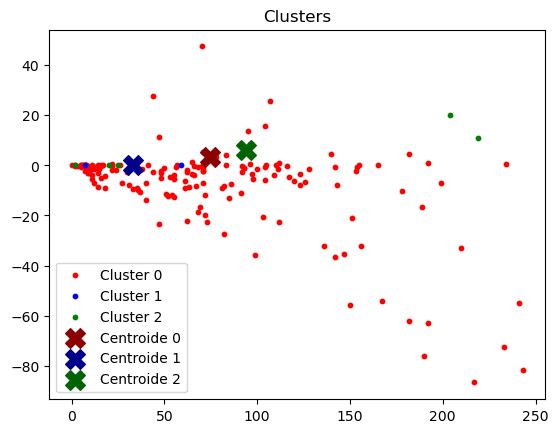

In [27]:
plt.scatter(dispps.values[y_hc == 0,0], dispps.values[y_hc == 0,1], s=10, c='red', label='Cluster 0') # tracer les points du cluster 0 en rouge
plt.scatter(dispps.values[y_hc == 1,0], dispps.values[y_hc == 1,1], s=10, c='blue', label='Cluster 1') # tracer les points du cluster 1 en bleu
plt.scatter(dispps.values[y_hc == 2,0], dispps.values[y_hc == 2,1], s=10, c='green', label='Cluster 2') # tracer les points du cluster 2 en vert
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='darkred', marker='X', label='Centroide 0') # X en grand pour centroide 0 en rouge
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='darkblue', marker='X', label='Centroide 1') # X en grand pour centroide 0 en bleu
plt.scatter(centroids[2][0], centroids[2][1], s=200, c='darkgreen', marker='X', label='Centroide 2') # X en grand pour centroide 2 en vert
plt.title('Clusters')
plt.legend()
plt.show()
plt.close()


In [28]:
D[D['Cluster CAH Scaled']==1]

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
Zone,,,,,,
Antigua-et-Barbuda,233.0,0.0,72.700081,17527.17,7.581580,1
Dominique,150.0,0.0,55.846422,7833.20,15.497382,1
Grenade,192.0,0.0,62.806180,9574.28,8.972311,1
Kiribati,63.0,0.0,8.632075,1605.01,8.891037,1
Saint-Kitts-et-Nevis,190.0,0.0,76.276196,22547.92,13.539025,1
Saint-Vincent-et-les Grenadines,243.0,0.0,81.661540,8399.69,7.712479,1
Sainte-Lucie,241.0,0.0,54.978586,11563.84,5.552837,1
Samoa,217.0,0.0,86.677646,4188.99,6.067435,1


# GRAPHIQUE PAR PAIRES, NUAGE DE POINTS ET HISTOGRAME (PAIRPLOT)

In [29]:
scaler = preprocessing.StandardScaler() 
Sdispps=pd.DataFrame(scaler.fit_transform(D), columns=D.columns, index=D.index)

In [30]:
Sdispps

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
Zone,,,,,,
Afghanistan,-1.151721,-0.310071,-0.543774,-0.707659,-0.315286,0.911504
Afrique du Sud,1.133238,-0.211604,-0.103072,-0.386153,-0.282777,-1.151374
Albanie,0.172893,-0.310071,0.129834,-0.472631,-0.218515,0.911504
Algérie,-0.870241,-0.310071,-0.583577,-0.527433,-0.289296,0.911504
Allemagne,-0.058915,0.391911,-0.035965,1.622053,-0.277105,-1.151374
...,...,...,...,...,...,...
Émirats arabes unis,1.199469,0.571547,1.855835,1.562284,-0.244369,-1.151374
Équateur,0.139778,-0.310071,-0.586149,-0.421865,-0.282426,0.911504
États-Unis d'Amérique,2.391622,0.709479,-0.565724,2.353030,-0.279809,-1.151374


In [31]:
#sns.pairplot(Sdispps, hue='Cluster CAH Scaled',height=3, kind='scatter', palette="Set2",
#             vars=[ 'Dispo alim Kcal/pers/jour','Exportations - Quantité/kg/personne/an' ,#'Balance Commerciale',
#       'Importations - Quantité/kg/personne/an', #'Population total',
#                    'Pib Per hab (2018, $)',
#       'Stabilité politique/personne/an']
#            )

In [32]:
#min_max_scaler = preprocessing.MinMaxScaler() 
scaler=StandardScaler()
Xdispps=pd.DataFrame(scaler.fit_transform(D), columns=D.columns, index=D.index)

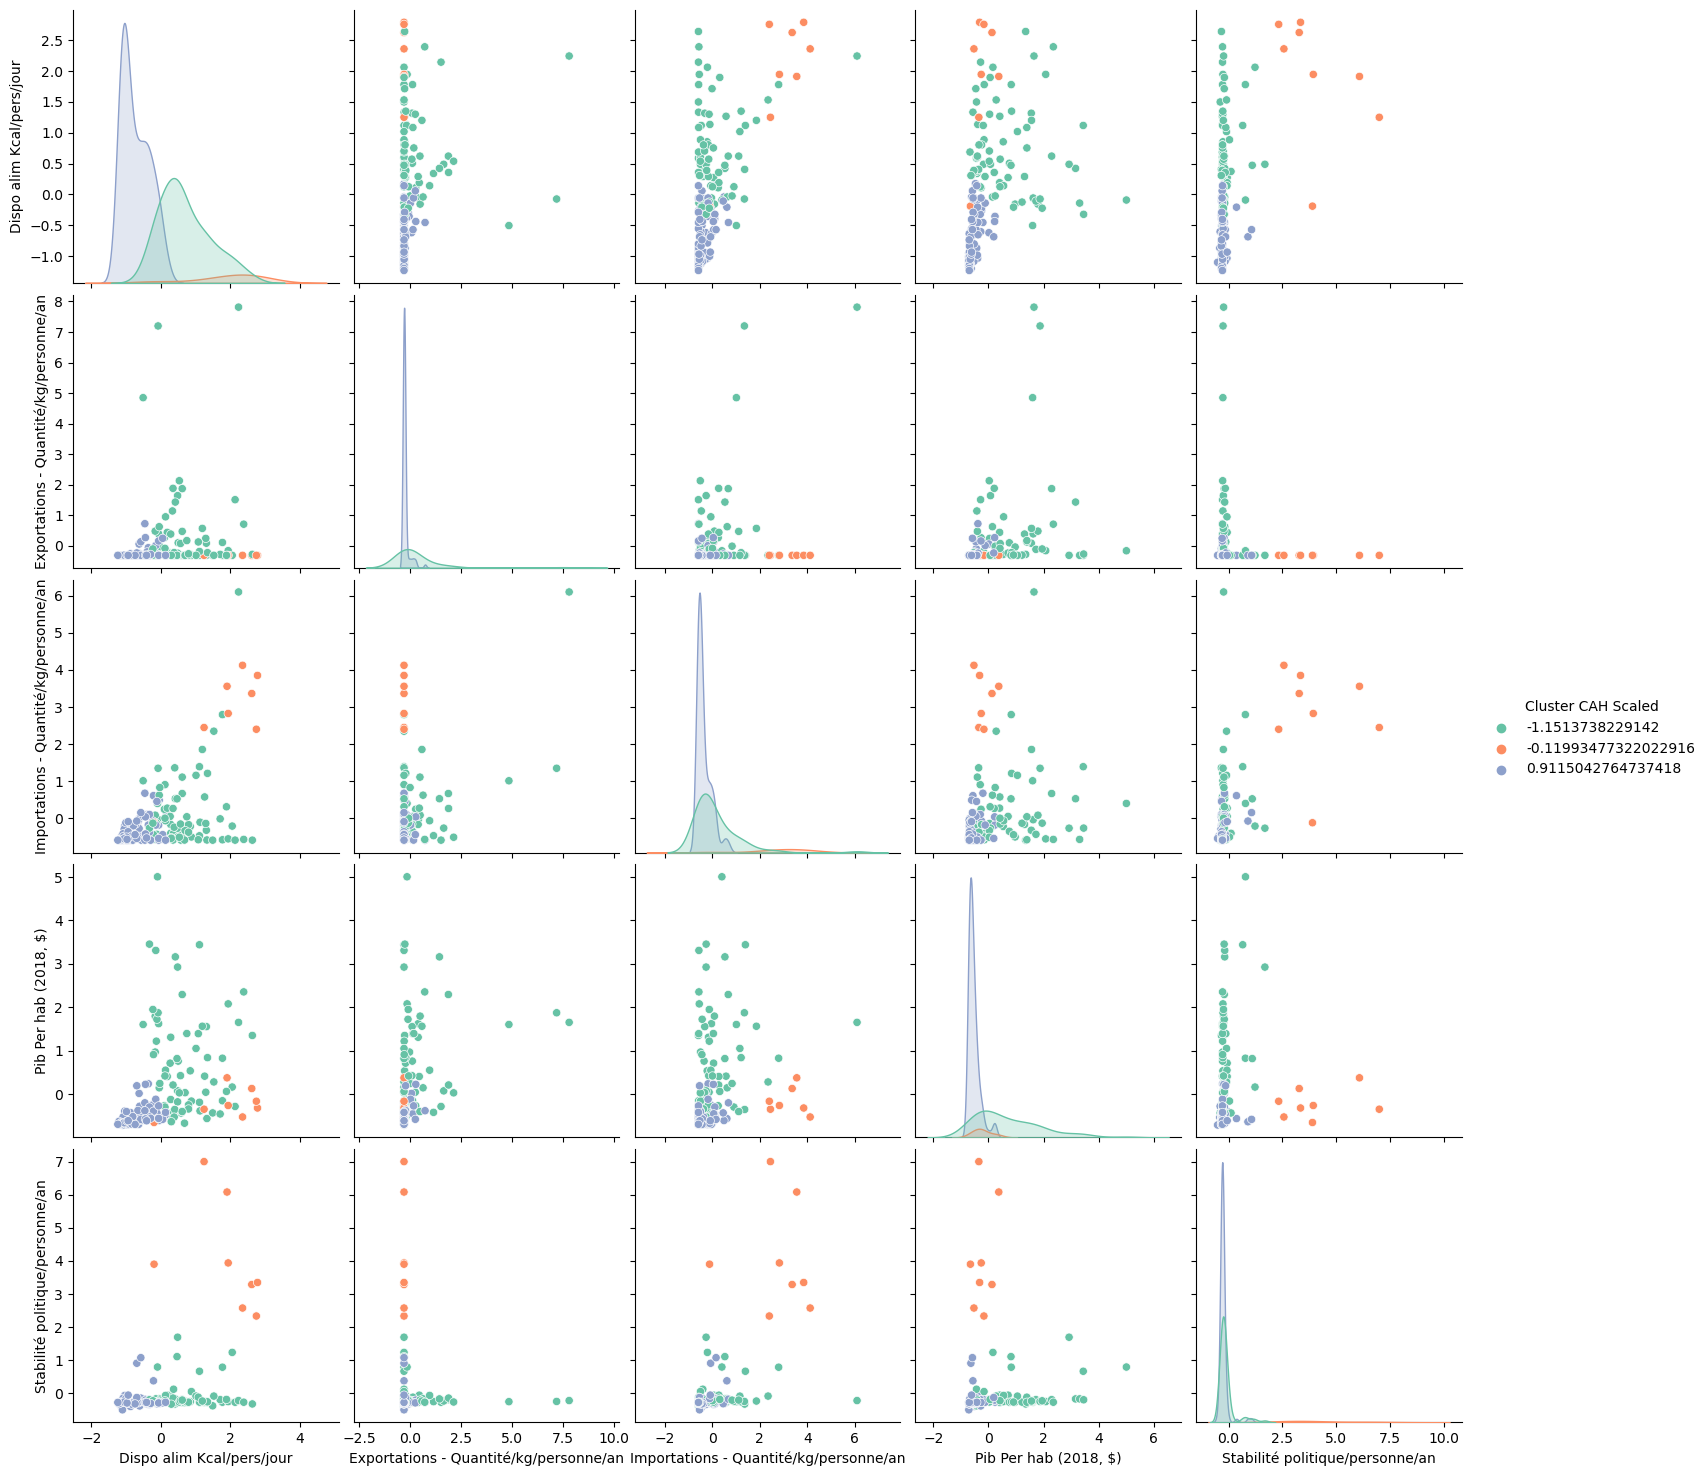

In [33]:
sns.pairplot(Xdispps, hue='Cluster CAH Scaled',height=3, kind='scatter', palette="Set2",
             vars=[ 'Dispo alim Kcal/pers/jour','Exportations - Quantité/kg/personne/an' ,#'Balance Commerciale',
       'Importations - Quantité/kg/personne/an', #'Population total', 
                   'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']
            )

In [34]:
#sns.pairplot(D, hue='Cluster CAH Scaled',height=3, kind='scatter', palette="Set2",
 #           vars=['Dispo alim Kcal/pers/jour',
  #     'Balance Commerciale', 'Exportations - Quantité',
     #         'Importations - Quantité', 'Production' , #'Population total',
   #    'Pib Per hab (2018, $)', 'Stabilité politique']
 #            vars=[ 'Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an' ,#'Balance Commerciale',
 #      'Importations - Quantité/kg/personne/an', #'Population total',
 #                  'Pib Per hab (2018, $)',
 #      'Stabilité politique/personne/an']
 #           )

## BOXPLOT AVEC DES CLUSTERS

<AxesSubplot:title={'center':'Dispo alim Kcal/pers/jour'}, xlabel='[Cluster CAH Scaled]'>

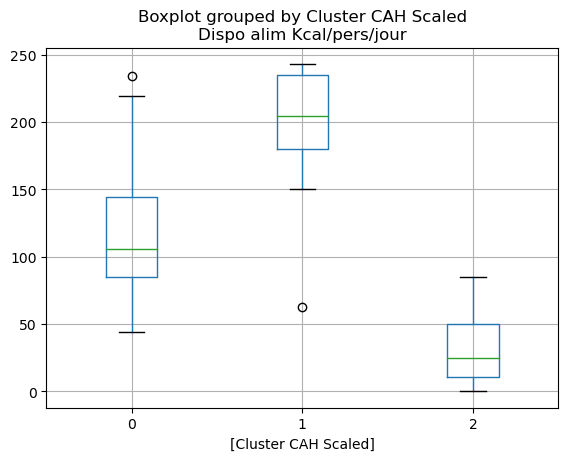

In [35]:
D[['Dispo alim Kcal/pers/jour','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

<AxesSubplot:title={'center':'Exportations - Quantité/kg/personne/an'}, xlabel='[Cluster CAH Scaled]'>

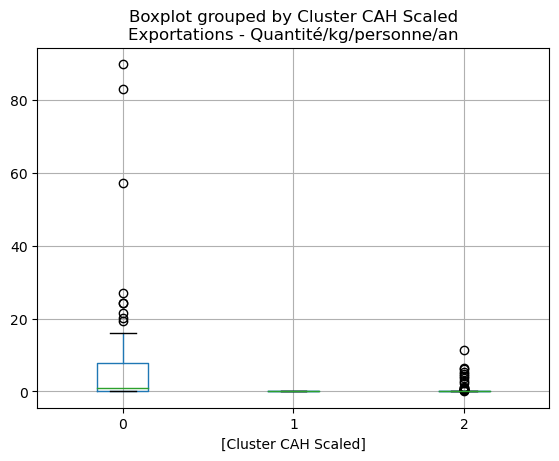

In [36]:
D[['Exportations - Quantité/kg/personne/an','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

<AxesSubplot:title={'center':'Importations - Quantité/kg/personne/an'}, xlabel='[Cluster CAH Scaled]'>

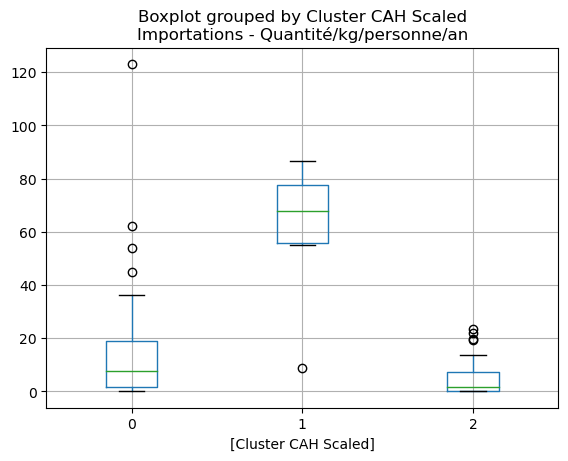

In [37]:
D[['Importations - Quantité/kg/personne/an','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

In [38]:
#D[['Population total','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

<AxesSubplot:title={'center':'Pib Per hab (2018, $)'}, xlabel='[Cluster CAH Scaled]'>

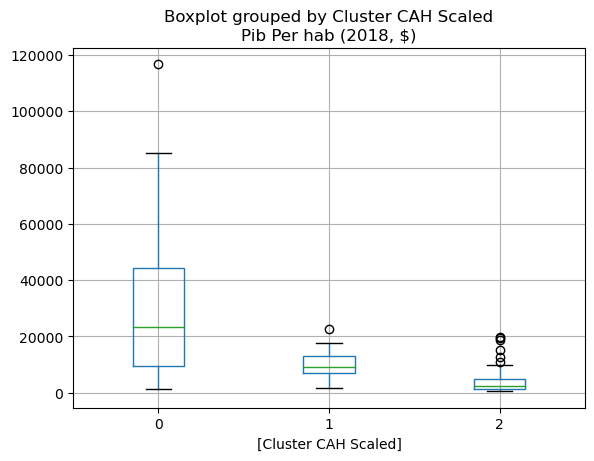

In [39]:
D[['Pib Per hab (2018, $)','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

<AxesSubplot:title={'center':'Stabilité politique/personne/an'}, xlabel='[Cluster CAH Scaled]'>

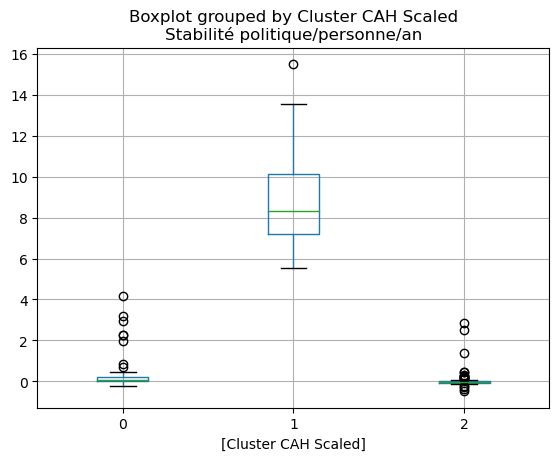

In [40]:
D[['Stabilité politique/personne/an','Cluster CAH Scaled']].boxplot(by='Cluster CAH Scaled')

# TABLEAU DE CONTINGENCE 

## DISPONIBILITE ALIMENTAIRE

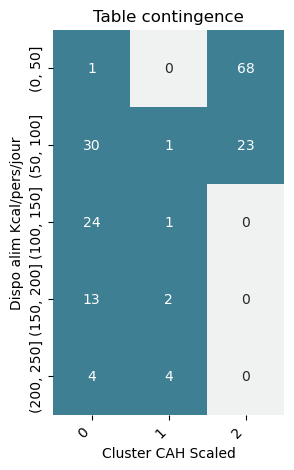

In [41]:
bins = [0,50,100,150, 200, 250,300,350,400,450,500,550, 600, 800, 1000]
#dispps['Dispo alim Kcal/pers/jour R'] = pd.cut(dispps['Dispo alim Kcal/pers/jour'], bins)#, labels = labels)
table=pd.crosstab( pd.cut(D['Dispo alim Kcal/pers/jour'], bins), D['Cluster CAH Scaled'],margins = False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(table, annot     = True, cbar      = False,
            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("Table contingence")
plt.show()

## EXPORTATIONS

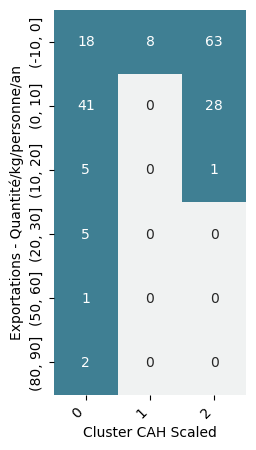

In [42]:
bins = [-2000,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700, 800, 900, 1000, 1200,1400,2000,4000,6000]
table=pd.crosstab( pd.cut(D['Exportations - Quantité/kg/personne/an'], bins), D['Cluster CAH Scaled'],margins = False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(table, annot     = True, cbar      = False,
            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

## IMPORTATIONS

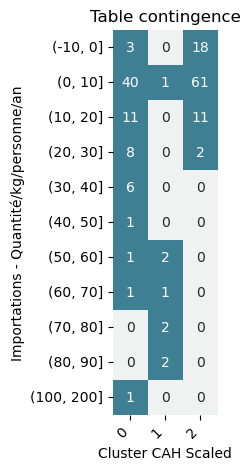

In [43]:
bins = [-2000,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700, 800, 900, 1000, 1200,1400,2000,4000,6000]
table=pd.crosstab( pd.cut(D['Importations - Quantité/kg/personne/an'], bins), D['Cluster CAH Scaled'],margins = False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(table, annot     = True, cbar      = False,
            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("Table contingence")
plt.show()

In [44]:
## POPULATION TOTAL

In [45]:
#bins = [1000000,10000000,30000000,50000000, 100000000, 300000000, 500000000, 700000000, 1000000000, 1500000000]
#table=pd.crosstab( pd.cut(dispps['Population total'], bins), dispps['Cluster CAH Scaled'],margins = False)
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
#sns.heatmap(table, annot     = True, cbar      = False,
#            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
#            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
#plt.show()

## PIB PER HAB (2018 $)

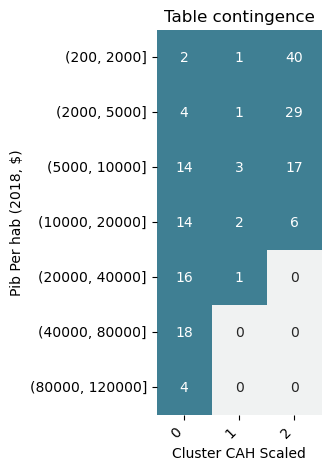

In [46]:
bins = [0,200,2000, 5000, 10000, 20000, 40000, 80000, 120000]
table=pd.crosstab( pd.cut(D['Pib Per hab (2018, $)'], bins), D['Cluster CAH Scaled'],margins = False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(table, annot     = True, cbar      = False,
            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("Table contingence")
plt.show()

## STABILITE POLITIQUE

In [47]:
#SELON Stabilité politique dans clusters

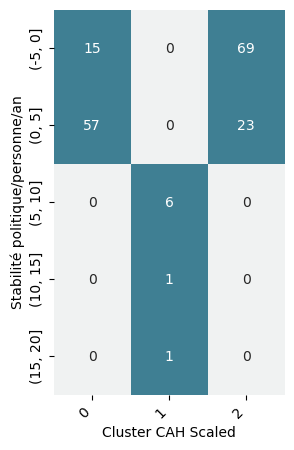

In [48]:
bins = [-2000,-50,-40,-30,-20,-10,-5,0,5,10,15,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700, 800, 900, 1000, 1200,1400,2000,4000,6000]
#labels = ['C', 'B', 'A', 'AA', 'AAA']
#D['Stabilité politique R'] = pd.cut(D['Stabilité politique'], bins)#, labels = labels)
table=pd.crosstab( pd.cut(D['Stabilité politique/personne/an'], bins), D['Cluster CAH Scaled'],margins = False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(table, annot     = True, cbar      = False,
            annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,
            center= 0, cmap= sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()

# CAH CLUSTERS MOYENNE

In [49]:
ClusterCAH=D.groupby(['Cluster CAH Scaled']).mean()

In [50]:
ClusterCAH

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Cluster CAH Scaled,,,,,
0,117.194444,7.456309,13.617787,29449.377083,0.325209
1,191.125000,0.000000,62.447341,10405.012500,9.226761
2,31.054348,0.582324,4.087893,3925.523152,0.058404


In [51]:
D[D['Cluster CAH Scaled']==0].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,117.194444,7.456309,13.617787,29449.377083,0.325209,0.0
std,43.969144,16.270363,18.867766,24594.895035,0.803508,0.0
min,44.000000,0.000000,0.000000,1274.920000,-0.231064,0.0
25%,85.250000,0.030205,1.594530,9365.310000,0.001636,0.0
50%,106.000000,1.046793,7.744187,23242.295000,0.054769,0.0
75%,144.000000,7.724484,18.775793,44116.892500,0.188345,0.0
max,234.000000,89.938183,123.037604,116786.510000,4.187543,0.0


In [52]:
D[D['Cluster CAH Scaled']==1].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
count,8.000000,8.0,8.000000,8.000000,8.000000,8.0
mean,191.125000,0.0,62.447341,10405.012500,9.226761,1.0
std,60.605133,0.0,24.635094,6833.978607,3.516745,0.0
min,63.000000,0.0,8.632075,1605.010000,5.552837,1.0
25%,180.000000,0.0,55.629463,6922.147500,7.203044,1.0
50%,204.500000,0.0,67.753131,8986.985000,8.301758,1.0
75%,235.000000,0.0,77.622532,13054.672500,10.113990,1.0
max,243.000000,0.0,86.677646,22547.920000,15.497382,1.0


In [53]:
D[D['Cluster CAH Scaled']==2].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.0
mean,31.054348,0.582324,4.087893,3925.523152,0.058404,2.0
std,23.603578,1.747308,5.468910,4131.375782,0.440998,0.0
min,0.000000,0.000000,0.000000,435.930000,-0.488603,2.0
25%,10.750000,0.000000,0.036205,1161.680000,-0.067545,2.0
50%,24.500000,0.000000,1.795079,2468.990000,-0.013428,2.0
75%,50.250000,0.028632,7.205780,4876.795000,0.000252,2.0
max,85.000000,11.465040,23.269523,19756.990000,2.870029,2.0


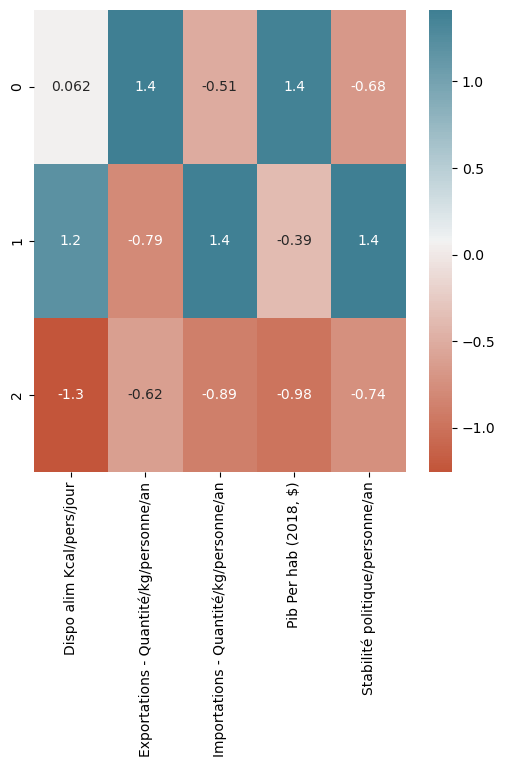

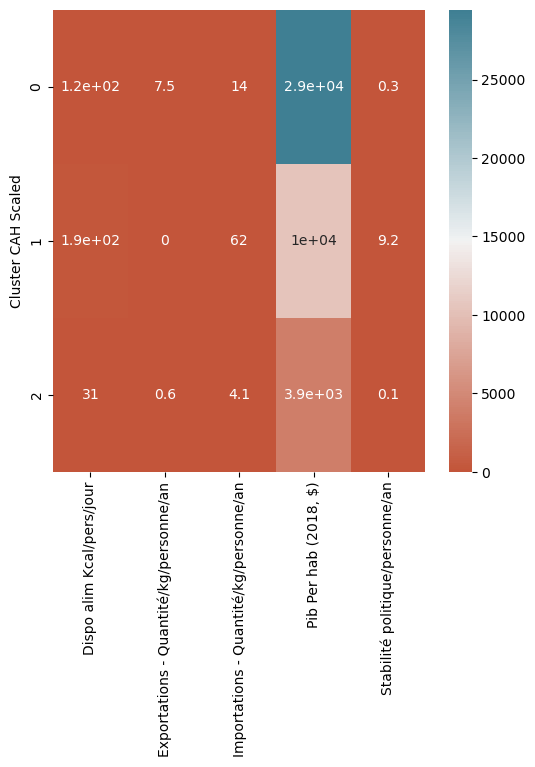

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Cluster CAH Scaled,,,,,
0,117.194444,7.456309,13.617787,29449.377083,0.325209
1,191.125000,0.000000,62.447341,10405.012500,9.226761
2,31.054348,0.582324,4.087893,3925.523152,0.058404


In [54]:
# CAH CLUSTERS MOYENNE


ClusterCAH=D.groupby(['Cluster CAH Scaled']).mean()


#min_max_scaler = preprocessing.MinMaxScaler() 
#ClusterCAH_Scale = min_max_scaler.fit_transform(ClusterCAH)
scaler = preprocessing.StandardScaler() 
ClusterCAH_Scale = scaler.fit_transform(ClusterCAH)

ClusterCAH_Scale = pd.DataFrame(ClusterCAH_Scale
                               ,columns =ClusterCAH.columns
                                #['Dispo alim Kcal/pers/jour', 'Balance Commerciale',
     #  'Exportations - Quantité', 'Importations - Quantité', 'Production',
     #  'Variation de stock', 'Pib Per hab (2018, $)', 'Stabilité politique']
                                
                               )
                                
   #                             ['Disponibilité alimentaire (Kcal/personne/jour)',
   #    'Balance Commerciale',# 'Populatio total',
   #    'Pib Per hab (2018, $)', 'Stabilité politique'] )


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(ClusterCAH_Scale,annot     = True, cmap      = sns.diverging_palette(20, 220, n=200))
#sns.heatmap(ClusterCAH_Scale, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()
ClusterCAH_Scale

round(ClusterCAH,2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(round(ClusterCAH,1), annot     = True,cmap      = sns.diverging_palette(20, 220, n=200))
#sns.heatmap(ClusterCAH, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()
ClusterCAH





In [55]:
ClusterCAH_Scale

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
0,0.062219,1.410724,-0.512465,1.371402,-0.675564
1,1.192450,-0.791351,1.397738,-0.386632,1.413751
2,-1.254668,-0.619373,-0.885273,-0.984770,-0.738187


In [56]:
ClusterCAH_Scale

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
0,0.062219,1.410724,-0.512465,1.371402,-0.675564
1,1.192450,-0.791351,1.397738,-0.386632,1.413751
2,-1.254668,-0.619373,-0.885273,-0.984770,-0.738187


In [57]:
#min_max_scaler = preprocessing.MinMaxScaler() 
#ClusterCAH_Scale = min_max_scaler.fit_transform(ClusterCAH)
#scaler = preprocessing.StandardScaler() 

#ClusterCAH_Scale = pd.DataFrame(scaler.fit_transform(ClusterCAH)
        #                       ,columns = ClusterCAH.columns
         #                      )
 #                               ['Dispo alim Kcal/pers/jour', 'Balance Commerciale',
 #      'Exportations - Quantité', 'Importations - Quantité', 'Production',
 #      'Variation de stock', 'Pib Per hab (2018, $)', 'Stabilité politique'])
  #                              
                                
                                
  #                              ['Disponibilité alimentaire (Kcal/personne/jour)',
  #     'Balance Commerciale', #'Population total',
   #    'Pib Per hab (2018, $)', 'Stabilité politique'] )


In [58]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
#sns.heatmap(ClusterCAH_Scale,annot     = True, cmap      = sns.diverging_palette(20, 220, n=200))
#sns.heatmap(ClusterCAH_Scale, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
#plt.show()
#ClusterCAH_Scale

In [59]:
round(ClusterCAH,2)

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Cluster CAH Scaled,,,,,
0,117.19,7.46,13.62,29449.38,0.33
1,191.12,0.00,62.45,10405.01,9.23
2,31.05,0.58,4.09,3925.52,0.06


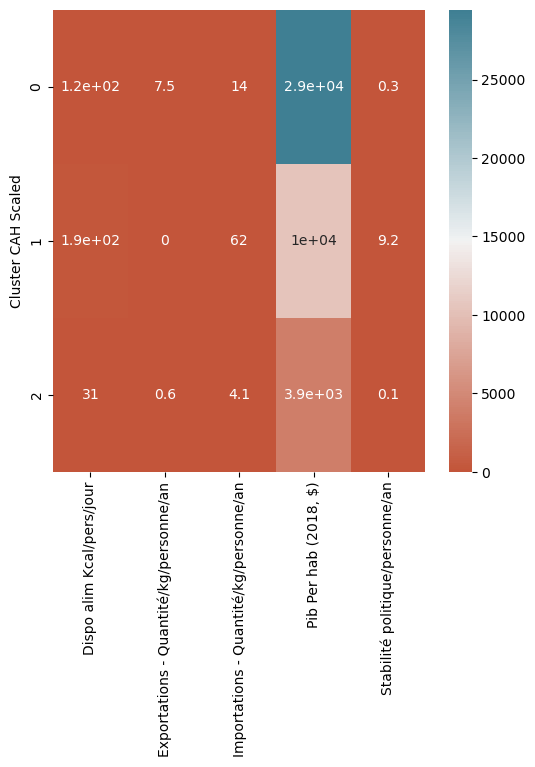

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Cluster CAH Scaled,,,,,
0,117.194444,7.456309,13.617787,29449.377083,0.325209
1,191.125000,0.000000,62.447341,10405.012500,9.226761
2,31.054348,0.582324,4.087893,3925.523152,0.058404


In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(round(ClusterCAH,1), annot     = True,cmap      = sns.diverging_palette(20, 220, n=200))
#sns.heatmap(ClusterCAH, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.show()
ClusterCAH

In [61]:
D[['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']][D['Cluster CAH Scaled']==1]

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Zone,,,,,
Antigua-et-Barbuda,233.0,0.0,72.700081,17527.17,7.581580
Dominique,150.0,0.0,55.846422,7833.20,15.497382
Grenade,192.0,0.0,62.806180,9574.28,8.972311
Kiribati,63.0,0.0,8.632075,1605.01,8.891037
Saint-Kitts-et-Nevis,190.0,0.0,76.276196,22547.92,13.539025
Saint-Vincent-et-les Grenadines,243.0,0.0,81.661540,8399.69,7.712479
Sainte-Lucie,241.0,0.0,54.978586,11563.84,5.552837
Samoa,217.0,0.0,86.677646,4188.99,6.067435


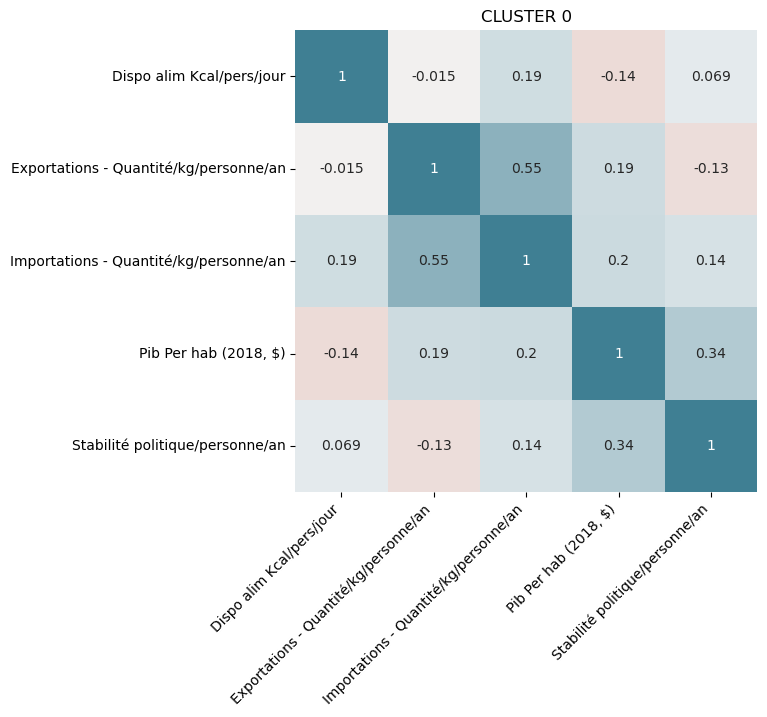

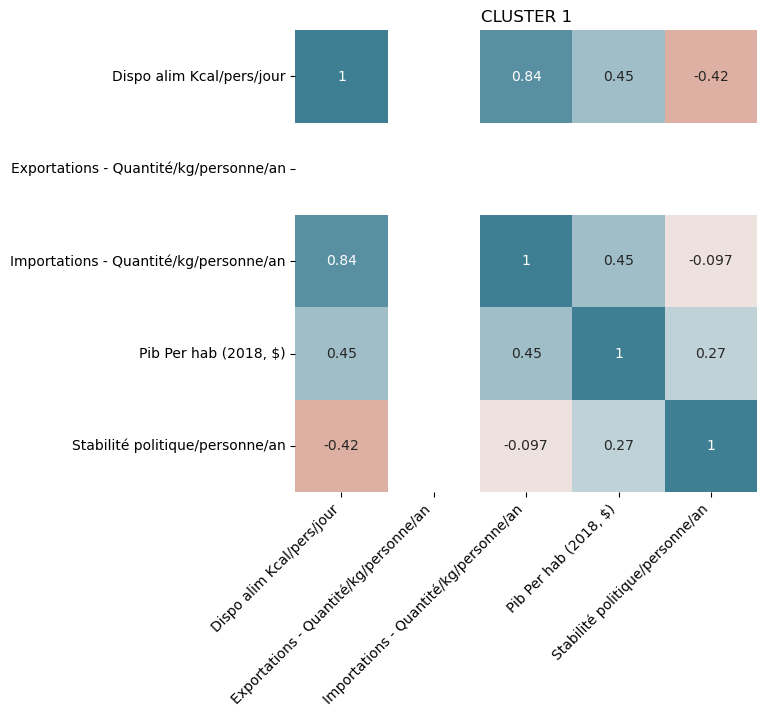

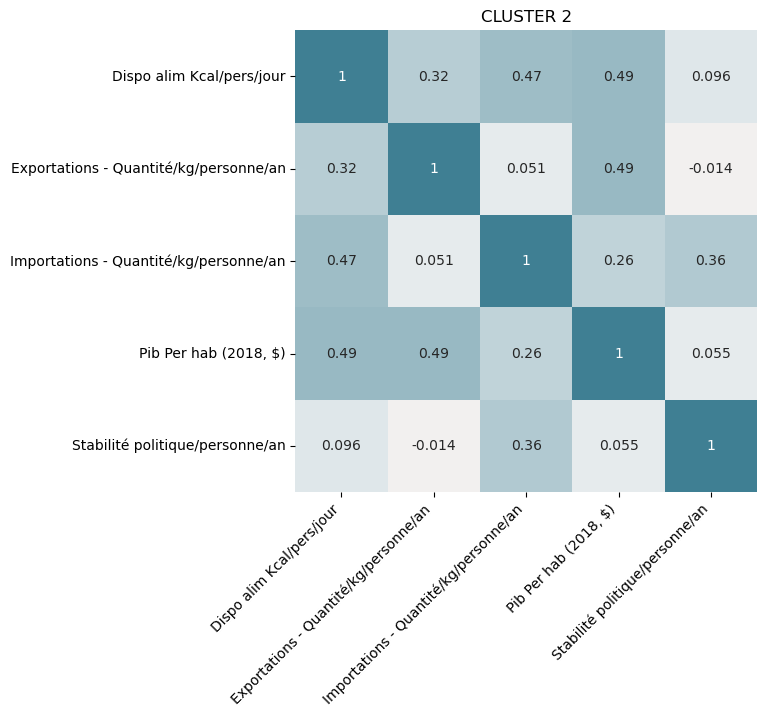

In [62]:
corr_matrix = D[['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']][D['Cluster CAH Scaled']==0].corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("CLUSTER 0")
plt.show()

corr_matrix = D[['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']][D['Cluster CAH Scaled']==1].corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("CLUSTER 1")
plt.show()


corr_matrix = D[['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an']][D['Cluster CAH Scaled']==2].corr(method='pearson')
corr_matrix=round (corr_matrix, 3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(corr_matrix, annot     = True, cbar      = False,annot_kws = {"size": 10}, vmin      = -1, vmax      = 1,center    = 0, cmap      = sns.diverging_palette(20, 220, n=200),square    = True, ax        = ax ),ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', ),ax.tick_params(labelsize = 10)
plt.title("CLUSTER 2")
plt.show()



In [63]:
ClusterCAH

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Cluster CAH Scaled,,,,,
0,117.194444,7.456309,13.617787,29449.377083,0.325209
1,191.125000,0.000000,62.447341,10405.012500,9.226761
2,31.054348,0.582324,4.087893,3925.523152,0.058404


# ACP

In [64]:
#La CAH est une méthode de regroupement qui groupe les objets en fonction de leur similarité ou distance,
#tandis que l'ACP est une méthode de réduction de dimensionnalité qui projette les données dans un 
#nouvel espace de dimension inférieure en éliminant les variables qui ne contribuent pas 
#significativement à la variance totale de l'ensemble de données.

#Pour ça, on utilise la biblioteque pca:

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(D[DC])

#min_max_scaler = preprocessing.MinMaxScaler() 
#X = min_max_scaler.fit_transform(dispps)

In [66]:
pca = PCA()
pca_data = pca.fit_transform(X)

## TAUX VARIANCE EXPLIQUÉ

In [67]:

# Le pourcentage de variance expliquée par chaque composante principale, on garde + de 70%
#1 CP est 45%
#2 CP est 45%(de 1CP) PLUS 23%
#3 CP est 68% PLUS 15%
# ETC....#Diagramme des éboulis de valeurs propres avec somme cumulée

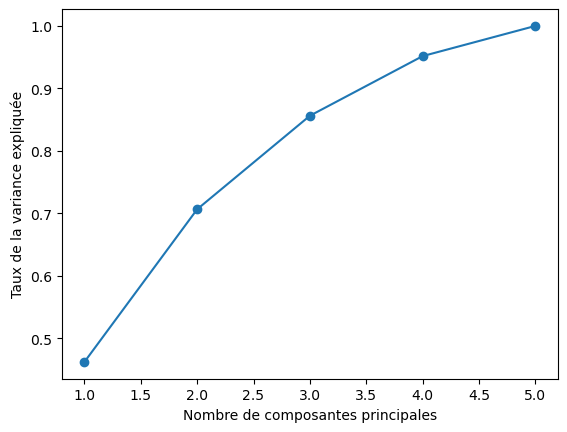

Nombre CP qu'on a besoin :  2  (plus que 70% d'explication de variabilité)


In [68]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Taux de la variance expliquée')
plt.show()
print ("Nombre CP qu'on a besoin : ", np.argmax(cumulative_explained_variance >= 0.70) + 1, " (plus que 70% d'explication de variabilité)")


In [69]:
# On a besoin au moins 2 CP

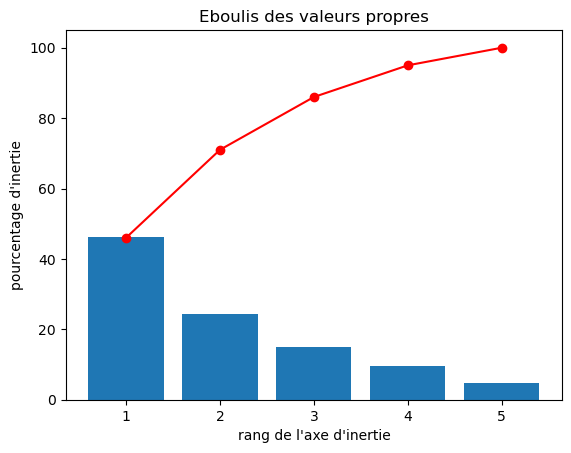

In [70]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, 6)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


In [71]:
pca.explained_variance_ratio_

array([0.46190817, 0.24447909, 0.14976006, 0.09551267, 0.04834001])

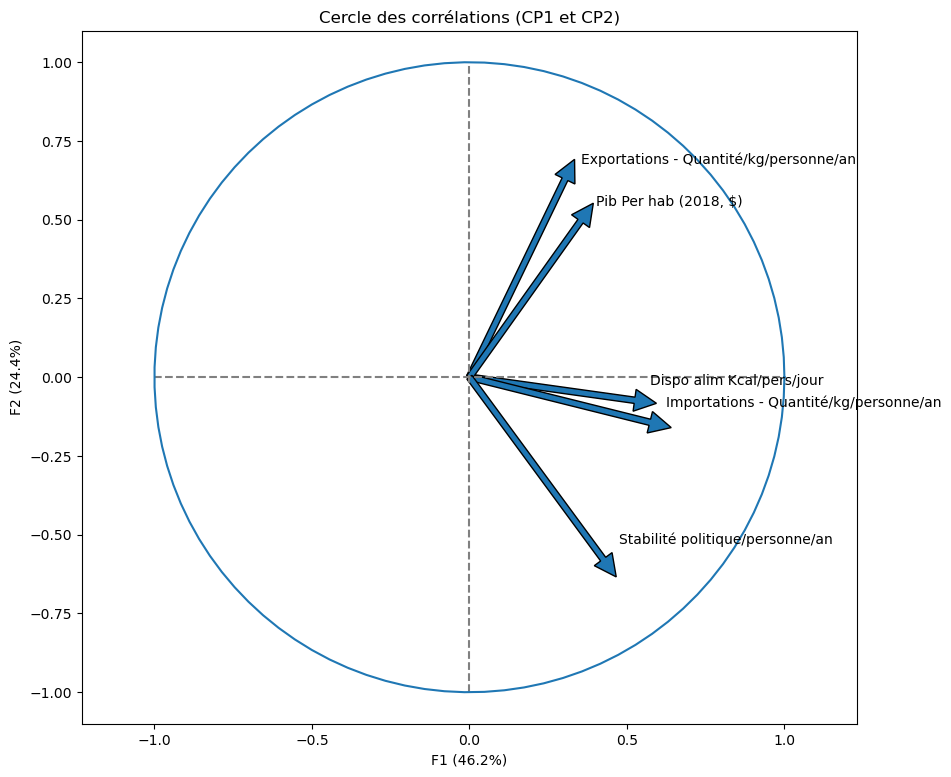

In [72]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             DC[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (CP{} et CP{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

## GRAPHIQUE

In [73]:
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(D[DC])

In [74]:
# NOMBRE COMPONENTES 
pca = PCA(n_components=5)
pca_X = pca.fit_transform(X)
#pca.fit(X)
#X_pca = pca.transform(X)

In [75]:
#DF avec des coordonnées des points projetés sur les CP
pca_X = pd.DataFrame(pca_X)
pca_X
#NOM PC1 et PC2
pca_X.rename(columns={0: 'PC1', 1: "PC2", 2: "PC3", 3: "PC4", 4: "PC5" }, inplace=True)

#pca_X['Zone'] = D.index
pca_X.index=D.index

In [76]:
pca_X

,PC1,PC2,PC3,PC4,PC5
Zone,,,,,
Afghanistan,-1.393136,-0.201369,0.443539,0.365226,-0.083601
Afrique du Sud,0.214778,-0.229250,-0.289717,-1.165685,0.165113
Albanie,-0.188594,-0.334109,0.100036,-0.449511,-0.234004
Algérie,-1.193682,-0.142003,0.223546,0.246654,0.007009
Allemagne,0.522026,1.219491,-0.825399,0.637207,-0.138623
...,...,...,...,...,...
Émirats arabes unis,2.312858,0.921260,-0.434543,-0.246169,-1.123612
Équateur,-0.625271,-0.167241,-0.170865,-0.457564,0.243914
États-Unis d'Amérique,1.856942,1.679200,-2.081540,-0.880102,0.884854


### DF avec VARIABLES ET CP:

In [77]:
#DD non scale et XX standardscale

In [78]:
DD = D.merge(pca_X, on='Zone')


In [79]:
XX=pd.DataFrame(X,columns=DC, index=D.index).merge(pca_X, on='Zone')

In [80]:
#XX.set_index('Zone', inplace=True)

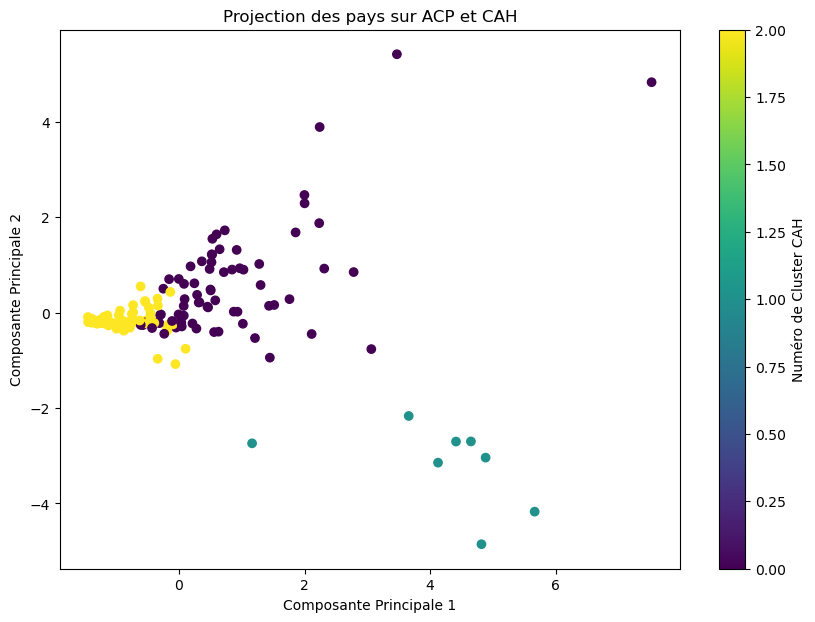

In [81]:
plt.figure(figsize=(10, 7))
plt.scatter(DD['PC1'], DD['PC2'], c=DD['Cluster CAH Scaled'])#, cmap='viridis')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des pays sur ACP et CAH')
plt.colorbar().set_label('Numéro de Cluster CAH')
plt.show()

In [82]:
#fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111)#, projection='3d')

#x = DD['PC1']
#y = DD['PC2']
#z = DD['PC3']
#c = DD['Cluster CAH Scaled']

#img = ax.scatter(x, y, #z,
 #                c=c, cmap='viridis')
#ax.set_xlabel('Composante Principale 1')
#ax.set_ylabel('Composante Principale 2')
#ax.set_zlabel('Composante Principale 3')
#ax.set_title('Projection des pays sur ACP et CAH')

#fig.colorbar(img, label='Numéro de Cluster CAH')

#plt.show()
#plt.close()

In [83]:
#DDP=DD.pivot_table( index=[ 'Dispo alim Kcal/pers/jour',
#       'Exportations - Quantité/kg/personne/an',
#       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
#       'Stabilité politique/personne/an'],
#                    columns=['PC1','PC2','PC3'], aggfunc=np.sum)

## CORRELATIONS ENTRE CP et VARIABLES ORIGINALES

In [84]:
#NON SCALE

#corrDD=DD.corr(method='pearson')
#plt.figure(figsize=(10, 6))
#sns.heatmap(corrDD.iloc[6:9, 0:5], annot=True, cmap='coolwarm', center=0, 
#            yticklabels=['PC1', 'PC2', 'PC3'])
#plt.xlabel('Variables originales')
#plt.ylabel('Componentes Principales (CP)')
#plt.title('Relación entre CP et variables originales')
#plt.show()

In [85]:
corrXX=XX.corr(method='pearson')
corrXX.iloc[5:10, 0:5]

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
PC1,0.797042,0.461137,0.870419,0.536175,0.645372
PC2,-0.080940,0.695047,-0.158099,0.547765,-0.638524
PC3,-0.278764,0.515875,0.296766,-0.561378,0.041813
PC4,-0.516244,0.015018,0.023115,0.307698,0.340026
PC5,0.118132,0.194707,-0.358848,-0.051435,0.241695


### HEATMAP

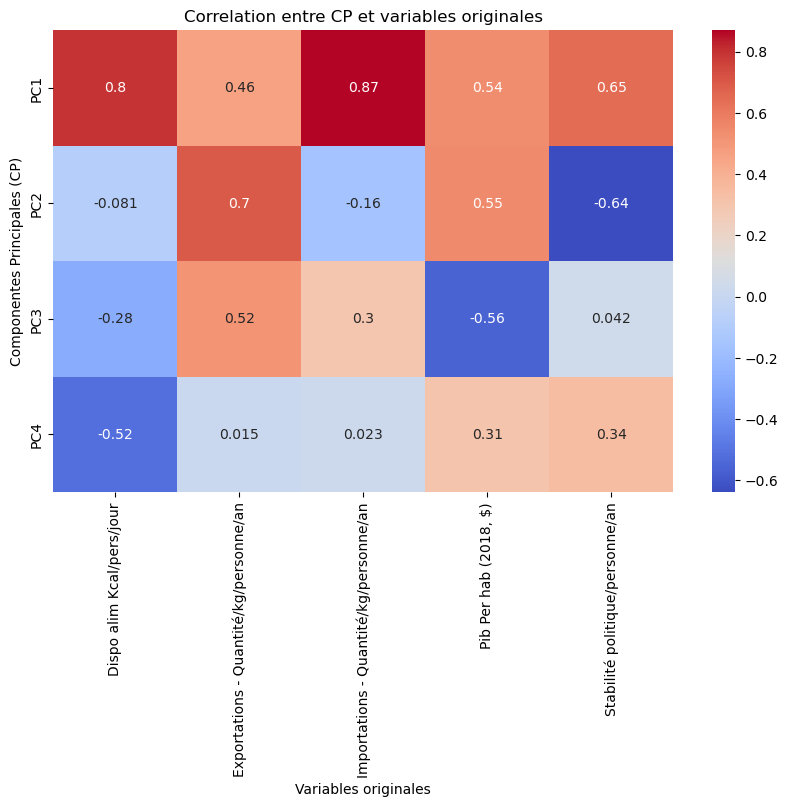

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(corrXX.iloc[5:9, 0:5],cmap='coolwarm', annot=True)
plt.xlabel('Variables originales')
plt.ylabel('Componentes Principales (CP)')
plt.title('Correlation entre CP et variables originales')
plt.show()

## CORRELATIONS ENTRE CP et CLUSTERS

In [87]:
XX['Cluster']=y_hc_XX

In [88]:
def get_cluster_value(x, cluster):
    if x == cluster:
        return 1
    else:
        return 0
df=XX
for i in range(3):
    cluster_col = 'Cluster ' + str(i)
    df[cluster_col] = df['Cluster'].apply(lambda x: get_cluster_value(x, i))



In [89]:
df=df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
        'Cluster 0', 'Cluster 1', 'Cluster 2']]

In [90]:
df=df.corr(method='pearson')

In [91]:
df=df.iloc[5:9, 0:5]

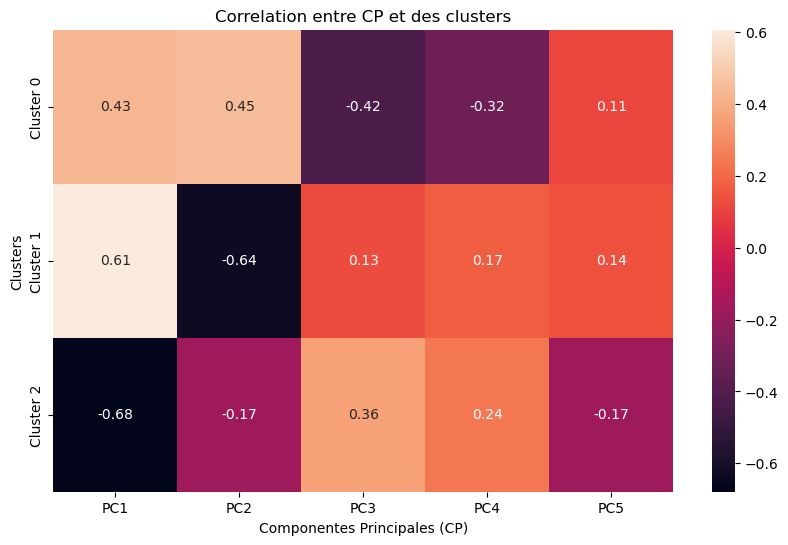

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True)
plt.ylabel('Clusters')
plt.xlabel('Componentes Principales (CP)')
plt.title('Correlation entre CP et des clusters')
plt.show()

# CLUSTER NUMERO 0 CAH (Subclusters)

In [93]:
D [  (D['Cluster CAH Scaled']==0 )   ]

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,Cluster CAH Scaled
Zone,,,,,,
Afrique du Sud,143.0,1.090107,8.893885,7048.52,-0.004845,0
Allemagne,71.0,7.771483,10.129394,47939.28,0.007218,0
Arabie saoudite,151.0,0.296712,21.422580,23318.74,-0.015429,0
Argentine,182.0,4.666245,0.180338,11795.16,0.000451,0
Australie,192.0,1.686872,0.642618,57207.87,0.039360,0
...,...,...,...,...,...,...
Suède,61.0,2.306542,8.423892,54589.06,0.091259,0
Tchéquie,82.0,2.531485,10.876009,23424.48,0.097509,0
Trinité-et-Tobago,189.0,0.000000,16.548632,16164.16,0.179876,0


In [94]:
NouvelleGroup=D [   (D['Cluster CAH Scaled']==0 )   ]
D2=NouvelleGroup

In [95]:
D2=D2[['Dispo alim Kcal/pers/jour',
       #'Balance Commerciale', 
       'Exportations - Quantité/kg/personne/an',
      'Importations - Quantité/kg/personne/an', #'Production', 'Variation de stock',
     #  'Population total', 
       'Pib Per hab (2018, $)', 'Stabilité politique/personne/an',
      # 'Cluster CAH Scaled'
      ]]

In [96]:
D2

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
Zone,,,,,
Afrique du Sud,143.0,1.090107,8.893885,7048.52,-0.004845
Allemagne,71.0,7.771483,10.129394,47939.28,0.007218
Arabie saoudite,151.0,0.296712,21.422580,23318.74,-0.015429
Argentine,182.0,4.666245,0.180338,11795.16,0.000451
Australie,192.0,1.686872,0.642618,57207.87,0.039360
...,...,...,...,...,...
Suède,61.0,2.306542,8.423892,54589.06,0.091259
Tchéquie,82.0,2.531485,10.876009,23424.48,0.097509
Trinité-et-Tobago,189.0,0.000000,16.548632,16164.16,0.179876


In [97]:
#min_max_scaler = preprocessing.MinMaxScaler() 
#X2 = min_max_scaler.fit_transform(D2)
scaler = preprocessing.StandardScaler() 
X2 = scaler.fit_transform(D2)


X2 = pd.DataFrame(X2) 

## NOMBRE DE SUBCLUSTERS EN CLUSTER 1

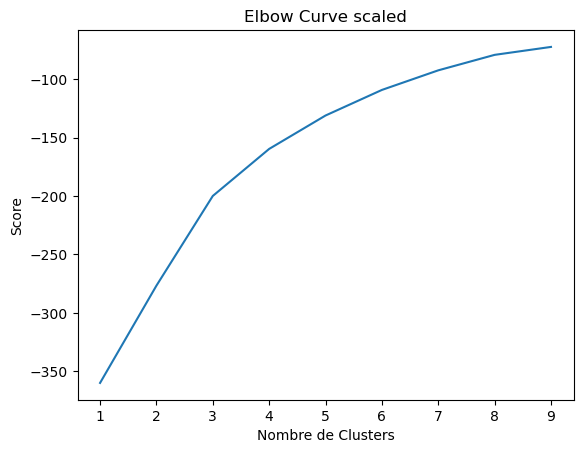

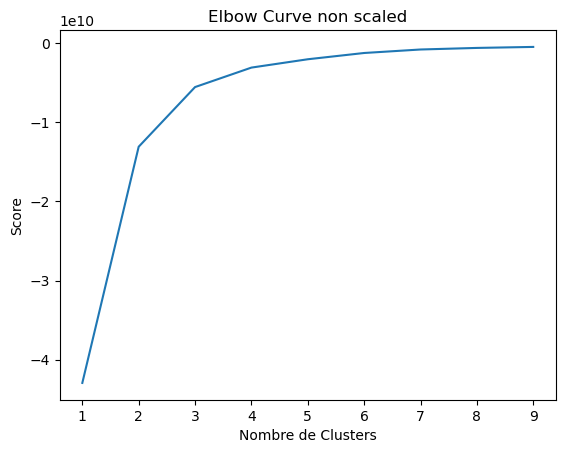

In [98]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve scaled')
plt.show()

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(D2).score(D2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve non scaled')
plt.show()





Text(0, 0.5, 'Moyenne indices silhouette')

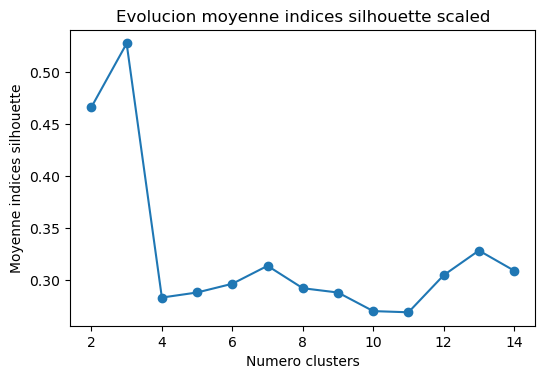

In [99]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion moyenne indices silhouette scaled")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Moyenne indices silhouette')

Text(0, 0.5, 'Moyenne indices silhouette')

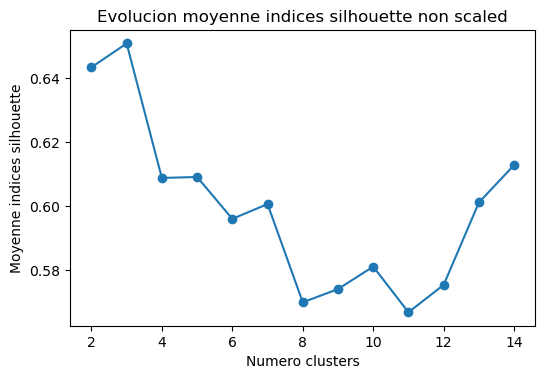

In [100]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(D2)
    silhouette_avg = silhouette_score(D2, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion moyenne indices silhouette non scaled")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Moyenne indices silhouette')

## DENDROGRAMME

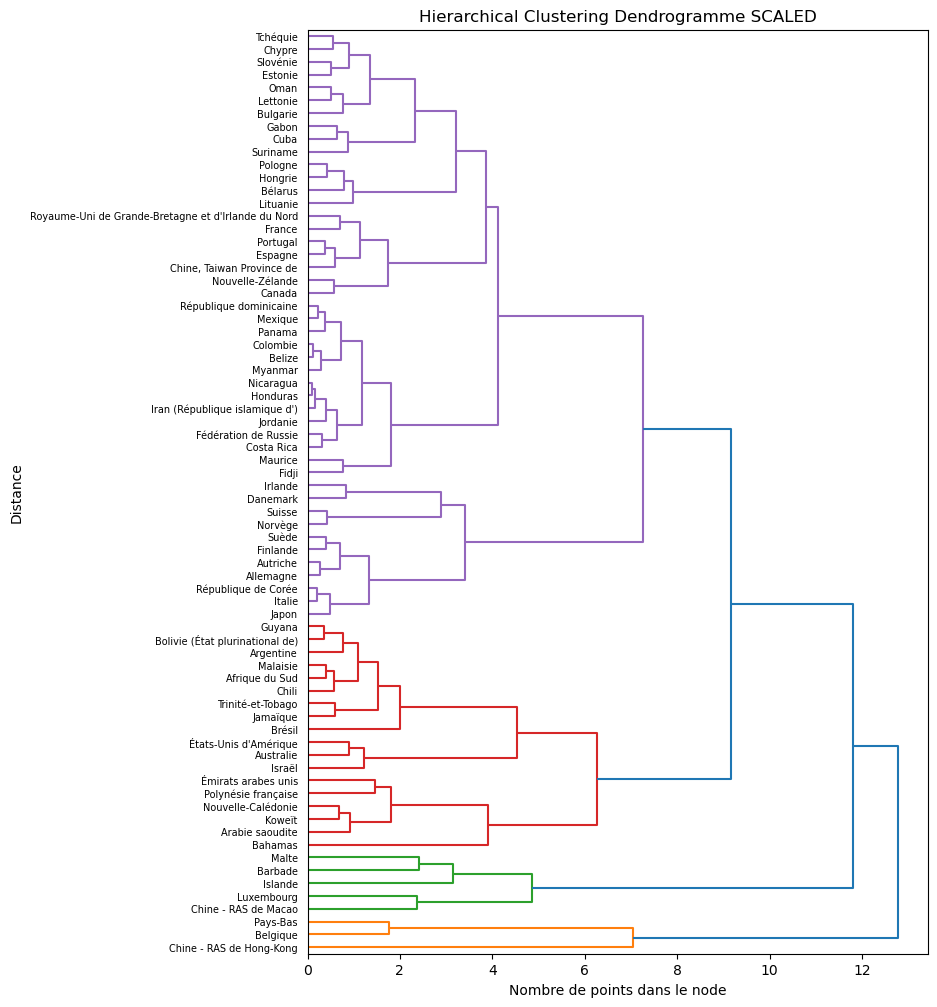

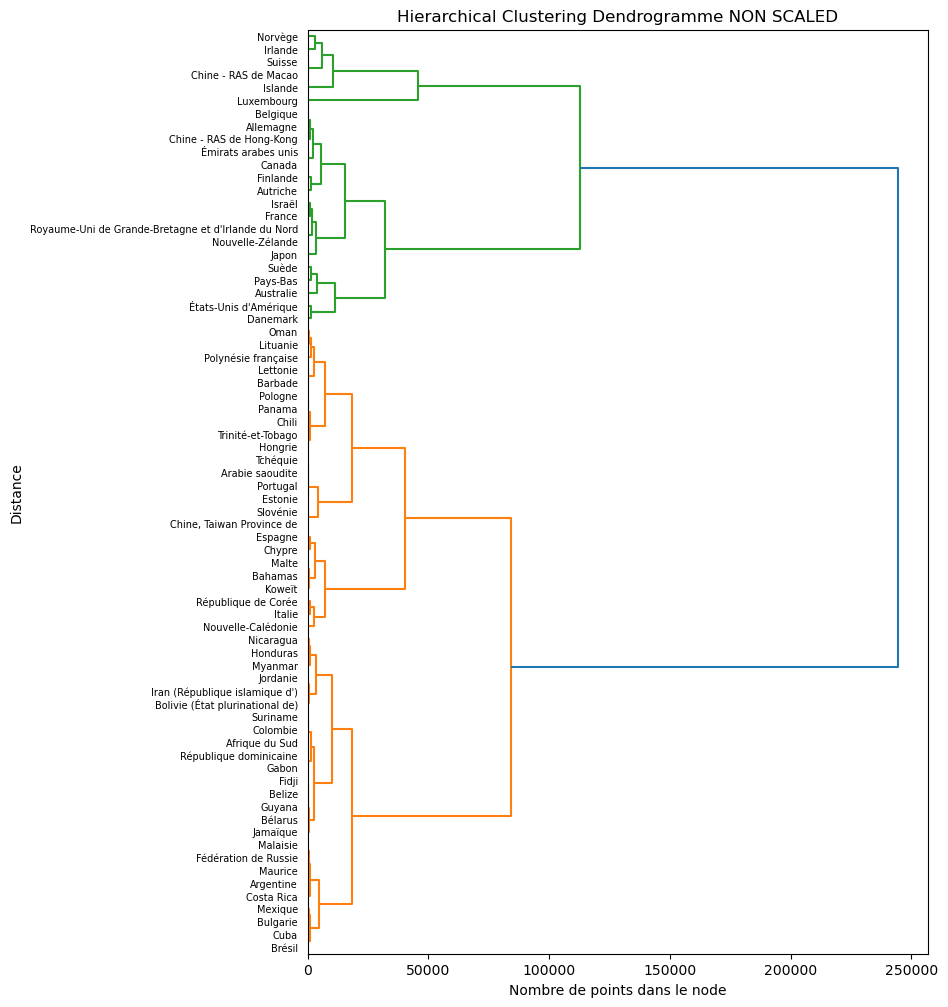

In [101]:
plt.figure(figsize=(8,12))
dendrogram = sch.dendrogram(sch.linkage(X2, method = 'ward'), labels=D2.index,leaf_font_size=7,orientation='right')
plt.title('Hierarchical Clustering Dendrogramme SCALED')
plt.xlabel('Nombre de points dans le node')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(8,12))
dendrogram = sch.dendrogram(sch.linkage(D2, method = 'ward'), labels=D2.index,leaf_font_size=7,orientation='right')
plt.title('Hierarchical Clustering Dendrogramme NON SCALED')
plt.xlabel('Nombre de points dans le node')
plt.ylabel('Distance')
plt.show()


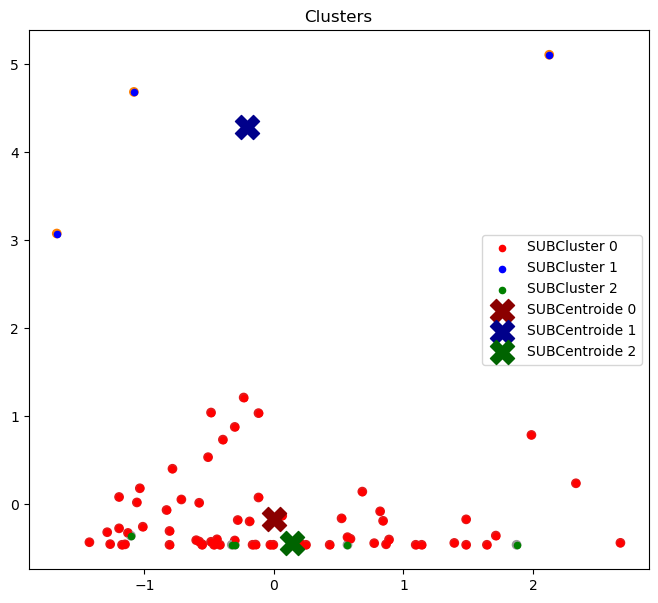

In [102]:
# Réaliser la classification hiérarchique
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X2)

# Obtenir les centroïdes de chaque cluster
centroids = []
for i in range(3):
    centroids.append(np.mean(X2[y_hc == i], axis=0))

# Tracer les points de données et les centroïdes dans un graphique
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_hc, cmap="Set1")

# Tracer les points du cluster 0 en rouge et les points du cluster 1 en bleu,vert cluster 2
ax.scatter(X2.iloc[y_hc == 0, 0], X2.iloc[y_hc == 0, 1], s=20, c='red', label='SUBCluster 0')
ax.scatter(X2.iloc[y_hc == 1, 0], X2.iloc[y_hc == 1, 1], s=20, c='blue', label='SUBCluster 1')
ax.scatter(X2.iloc[y_hc == 2, 0], X2.iloc[y_hc == 2, 1], s=20, c='green', label='SUBCluster 2')

# Tracer les centroïdes du cluster 0 en rouge foncé et du cluster 1 en bleu foncé, vert cluster 2
ax.scatter(centroids[0][0], centroids[0][1], s=300, c='darkred', marker='X', label='SUBCentroide 0')
ax.scatter(centroids[1][0], centroids[1][1], s=300, c='darkblue', marker='X', label='SUBCentroide 1')
ax.scatter(centroids[2][0], centroids[2][1], s=300, c='darkgreen', marker='X', label='SUBCentroide 2')


# Ajouter un titre et une légende au graphique
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Afficher le graphique
plt.show()


In [103]:
D2['SUBCluster 1 CAH Scaled']=y_hc

In [104]:
D2[D2['SUBCluster 1 CAH Scaled']==0].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,117.140625,4.765759,11.005338,25707.247813,0.134767,0.0
std,41.986342,6.992173,13.475329,21060.025420,0.325978,0.0
min,55.000000,0.000000,0.000000,1274.920000,-0.231064,0.0
25%,89.750000,0.076791,1.565678,8610.722500,0.000671,0.0
50%,108.000000,1.046793,6.603973,19536.965000,0.038194,0.0
75%,144.000000,6.713347,15.413541,40184.802500,0.166665,0.0
max,234.000000,27.029456,62.234692,85217.370000,2.256008,0.0


In [105]:
D2[D2['SUBCluster 1 CAH Scaled']==1].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,108.000000,76.730250,62.704790,49709.026667,0.064624,1.0
std,89.286057,17.311501,52.341718,2930.954724,0.037628,0.0
min,44.000000,57.132018,29.436924,47544.980000,0.035708,1.0
25%,57.000000,70.126284,32.538382,48041.275000,0.043353,1.0
50%,70.000000,83.120549,35.639841,48537.570000,0.050998,1.0
75%,140.000000,86.529366,79.338723,50791.050000,0.079082,1.0
max,210.000000,89.938183,123.037604,53044.530000,0.107166,1.0


In [106]:
D2[D2['SUBCluster 1 CAH Scaled']==2].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,123.400000,0.330992,17.604925,65192.842000,2.919216,2.0
std,49.530798,0.740120,12.363850,40229.750503,0.862089,0.0
min,69.000000,0.000000,5.939777,18224.890000,1.994820,2.0
25%,103.000000,0.000000,6.977369,31567.940000,2.267292,2.0
50%,104.000000,0.000000,18.204536,74461.480000,2.936838,2.0
75%,142.000000,0.000000,20.489564,84923.390000,3.209590,2.0
max,199.000000,1.654958,36.413377,116786.510000,4.187543,2.0


In [107]:
SUBClusterCAH=D2.groupby(['SUBCluster 1 CAH Scaled']).mean()


## CAH SUBCLUSTERS MOYENNE ET DESCRIBE

In [108]:
SUBClusterCAH

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
SUBCluster 1 CAH Scaled,,,,,
0,117.140625,4.765759,11.005338,25707.247812,0.134767
1,108.000000,76.730250,62.704790,49709.026667,0.064624
2,123.400000,0.330992,17.604925,65192.842000,2.919216


In [109]:
D2[D2['SUBCluster 1 CAH Scaled']==0].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,117.140625,4.765759,11.005338,25707.247813,0.134767,0.0
std,41.986342,6.992173,13.475329,21060.025420,0.325978,0.0
min,55.000000,0.000000,0.000000,1274.920000,-0.231064,0.0
25%,89.750000,0.076791,1.565678,8610.722500,0.000671,0.0
50%,108.000000,1.046793,6.603973,19536.965000,0.038194,0.0
75%,144.000000,6.713347,15.413541,40184.802500,0.166665,0.0
max,234.000000,27.029456,62.234692,85217.370000,2.256008,0.0


In [110]:
D2[D2['SUBCluster 1 CAH Scaled']==1].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,108.000000,76.730250,62.704790,49709.026667,0.064624,1.0
std,89.286057,17.311501,52.341718,2930.954724,0.037628,0.0
min,44.000000,57.132018,29.436924,47544.980000,0.035708,1.0
25%,57.000000,70.126284,32.538382,48041.275000,0.043353,1.0
50%,70.000000,83.120549,35.639841,48537.570000,0.050998,1.0
75%,140.000000,86.529366,79.338723,50791.050000,0.079082,1.0
max,210.000000,89.938183,123.037604,53044.530000,0.107166,1.0


In [111]:
D2[D2['SUBCluster 1 CAH Scaled']==2].describe()

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,123.400000,0.330992,17.604925,65192.842000,2.919216,2.0
std,49.530798,0.740120,12.363850,40229.750503,0.862089,0.0
min,69.000000,0.000000,5.939777,18224.890000,1.994820,2.0
25%,103.000000,0.000000,6.977369,31567.940000,2.267292,2.0
50%,104.000000,0.000000,18.204536,74461.480000,2.936838,2.0
75%,142.000000,0.000000,20.489564,84923.390000,3.209590,2.0
max,199.000000,1.654958,36.413377,116786.510000,4.187543,2.0


## HEATMAP SUBCLUSTERS ET LEURS CORRELATIONS

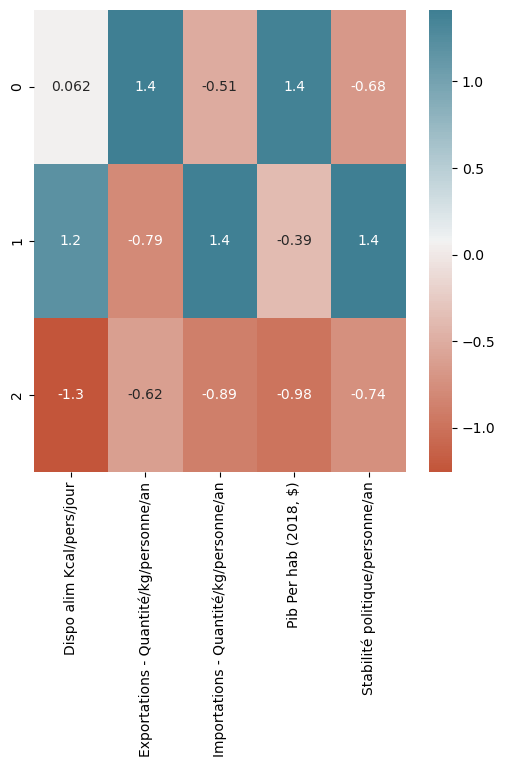

In [112]:
#min_max_scaler = preprocessing.MinMaxScaler() 
#SUBClusterCAH_Scale = min_max_scaler.fit_transform(SUBClusterCAH)
scaler = preprocessing.StandardScaler() 
SUBClusterCAH_Scale = scaler.fit_transform(SUBClusterCAH)

SUBClusterCAH_Scale = pd.DataFrame(SUBClusterCAH_Scale
                               ,columns =['Dispo alim Kcal/pers/jour', 'Exportations - Quantité/kg/personne/an',
       'Importations - Quantité/kg/personne/an', 'Pib Per hab (2018, $)',
       'Stabilité politique/personne/an'])


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(ClusterCAH_Scale,annot     = True, cmap      = sns.diverging_palette(20, 220, n=200))
plt.show()




In [113]:
SUBClusterCAH_Scale

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
0,0.151878,-0.642837,-0.845857,-1.302748,-0.680562
1,-1.293601,1.412322,1.404455,0.174787,-0.733323
2,1.141722,-0.769485,-0.558598,1.127961,1.413885


In [114]:
round(SUBClusterCAH,2)

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
SUBCluster 1 CAH Scaled,,,,,
0,117.14,4.77,11.01,25707.25,0.13
1,108.00,76.73,62.70,49709.03,0.06
2,123.40,0.33,17.60,65192.84,2.92


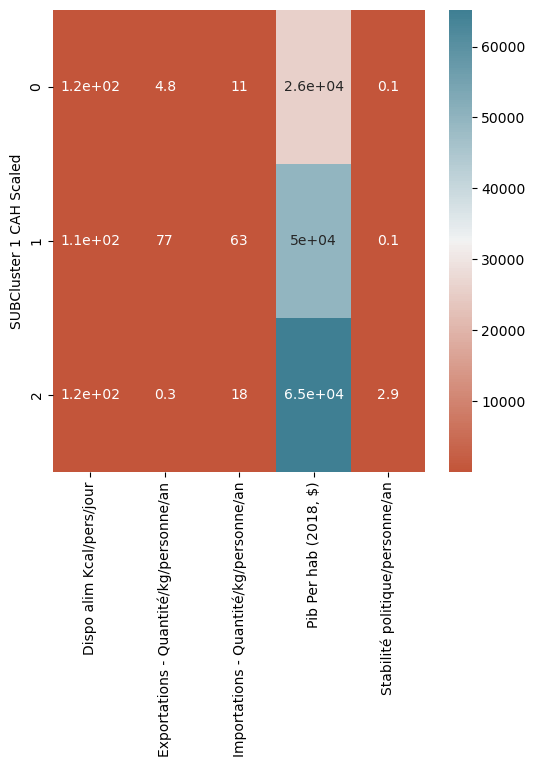

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an
SUBCluster 1 CAH Scaled,,,,,
0,117.140625,4.765759,11.005338,25707.247812,0.134767
1,108.000000,76.730250,62.704790,49709.026667,0.064624
2,123.400000,0.330992,17.604925,65192.842000,2.919216


In [115]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(round(SUBClusterCAH,1), annot     = True,cmap      = sns.diverging_palette(20, 220, n=200))
plt.show()
SUBClusterCAH

# PAYS CHOISIS

In [116]:
D2[D2['SUBCluster 1 CAH Scaled']==1].sort_values(by='Importations - Quantité/kg/personne/an', ascending =False)#.head(3)

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
Zone,,,,,,
Chine - RAS de Hong-Kong,210.0,89.938183,123.037604,48537.57,0.107166,1
Pays-Bas,70.0,83.120549,35.639841,53044.53,0.050998,1
Belgique,44.0,57.132018,29.436924,47544.98,0.035708,1


In [117]:
D2[D2['SUBCluster 1 CAH Scaled']==2].sort_values(by='Importations - Quantité/kg/personne/an', ascending =False).head(3)

,Dispo alim Kcal/pers/jour,Exportations - Quantité/kg/personne/an,Importations - Quantité/kg/personne/an,"Pib Per hab (2018, $)",Stabilité politique/personne/an,SUBCluster 1 CAH Scaled
Zone,,,,,,
Chine - RAS de Macao,142.0,0.000000,36.413377,84923.39,1.994820,2
Malte,103.0,0.000000,20.489564,31567.94,2.936838,2
Luxembourg,69.0,1.654958,18.204536,116786.51,2.267292,2


# 